In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.feature_selection import RFE
from imblearn.over_sampling import SMOTE

In [6]:
# Step 1: Load Dataset and Perform EDA
df = pd.read_csv('/content/drive/MyDrive/heart_disease_missing.csv')

In [7]:
# Display basic information
print("Basic Information:")
df.info()

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   9482 non-null   float64
 1   Gender                9486 non-null   object 
 2   Blood Pressure        9499 non-null   float64
 3   Cholesterol Level     9457 non-null   float64
 4   Exercise Habits       9483 non-null   object 
 5   Smoking               9457 non-null   object 
 6   Family Heart Disease  9499 non-null   object 
 7   Diabetes              9493 non-null   object 
 8   BMI                   9468 non-null   float64
 9   High Blood Pressure   9483 non-null   object 
 10  Low HDL Cholesterol   9472 non-null   object 
 11  High LDL Cholesterol  9474 non-null   object 
 12  Alcohol Consumption   7022 non-null   object 
 13  Stress Level          9538 non-null   object 
 14  Sleep Hours           9523 non-null   float64
 15  S

In [8]:
# Display the first few rows
print("First 5 rows:")
print(df.head())

First 5 rows:
    Age  Gender  Blood Pressure  Cholesterol Level Exercise Habits Smoking  \
0  56.0    Male           153.0              155.0            High     Yes   
1  69.0  Female           146.0              286.0            High      No   
2  46.0    Male           126.0              216.0             Low      No   
3  32.0  Female           122.0              293.0            High     Yes   
4  60.0    Male           166.0              242.0             Low     Yes   

  Family Heart Disease Diabetes        BMI High Blood Pressure  ...  \
0                  Yes      NaN  24.991591                 Yes  ...   
1                  Yes      Yes  25.221799                  No  ...   
2                   No       No  29.855447                  No  ...   
3                  Yes       No  24.130477                 Yes  ...   
4                  Yes      Yes  20.486289                 Yes  ...   

  High LDL Cholesterol Alcohol Consumption Stress Level Sleep Hours  \
0                  

In [9]:
# Check for missing values
print("Missing Values:")
print(df.isnull().sum())
print("\n")

Missing Values:
Age                      518
Gender                   514
Blood Pressure           501
Cholesterol Level        543
Exercise Habits          517
Smoking                  543
Family Heart Disease     501
Diabetes                 507
BMI                      532
High Blood Pressure      517
Low HDL Cholesterol      528
High LDL Cholesterol     526
Alcohol Consumption     2978
Stress Level             462
Sleep Hours              477
Sugar Consumption        509
Triglyceride Level       524
Fasting Blood Sugar      546
CRP Level                539
Homocysteine Level       468
Heart Disease Status     508
dtype: int64




In [10]:
# Summary statistics
print("Summary Statistics:")
print(df.describe(include='all'))
print("\n")

Summary Statistics:
                Age Gender  Blood Pressure  Cholesterol Level Exercise Habits  \
count   9482.000000   9486     9499.000000        9457.000000            9483   
unique          NaN      2             NaN                NaN               3   
top             NaN   Male             NaN                NaN            High   
freq            NaN   4758             NaN                NaN            3202   
mean      49.252162    NaN      149.783767         225.446548             NaN   
std       18.207954    NaN       17.555795          43.635902             NaN   
min       18.000000    NaN      120.000000         150.000000             NaN   
25%       34.000000    NaN      134.000000         187.000000             NaN   
50%       49.000000    NaN      150.000000         226.000000             NaN   
75%       65.000000    NaN      165.000000         263.000000             NaN   
max       80.000000    NaN      180.000000         300.000000             NaN   

       

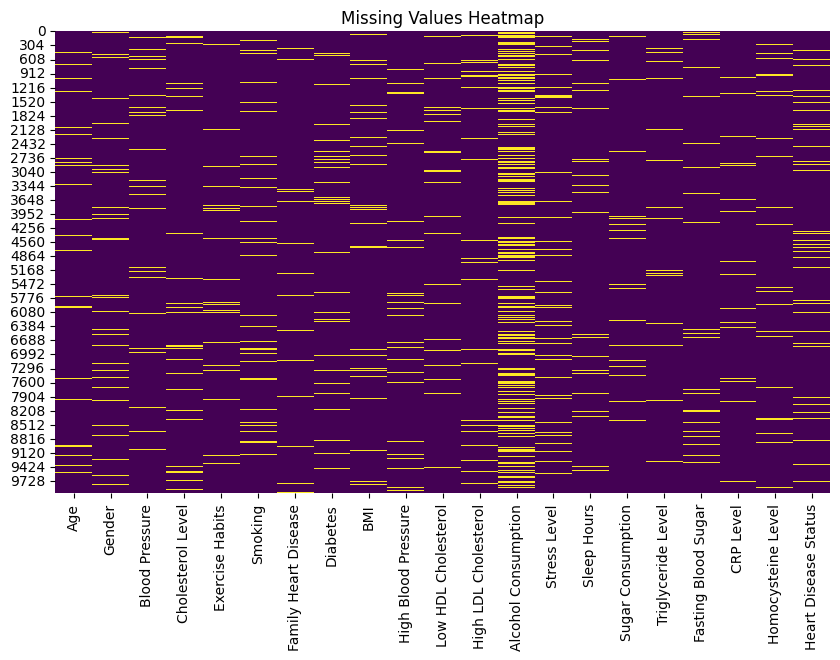

In [11]:
# Visualizing missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

In [12]:
# Handling missing values (You can modify the approach based on data insights)
df.fillna(df.median(numeric_only=True), inplace=True)  # Filling numeric columns with median
df.fillna(df.mode().iloc[0], inplace=True)  # Filling categorical columns with mode

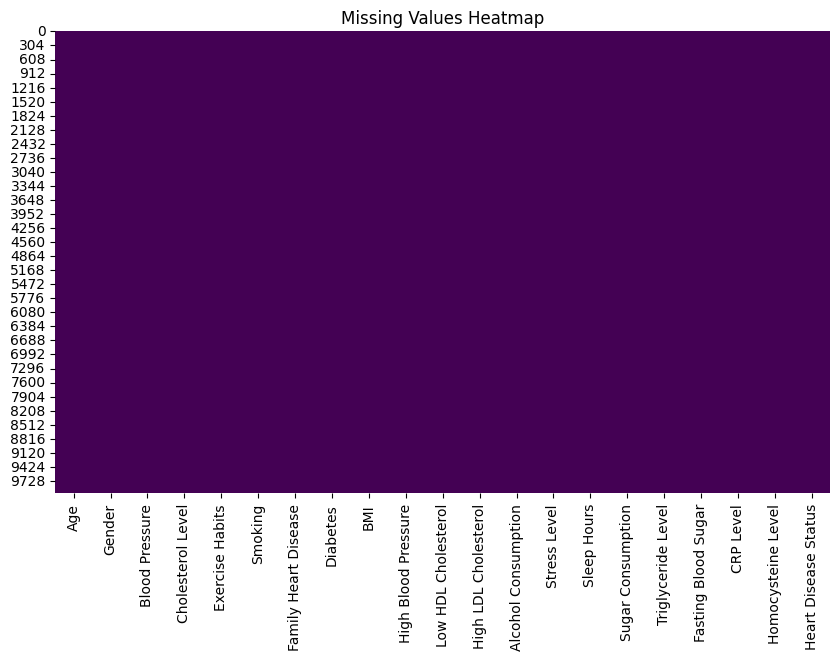

In [13]:
# Visualizing missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

<ipython-input-14-1c1e7930d6db>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Heart Disease Status', data=df, palette='coolwarm')


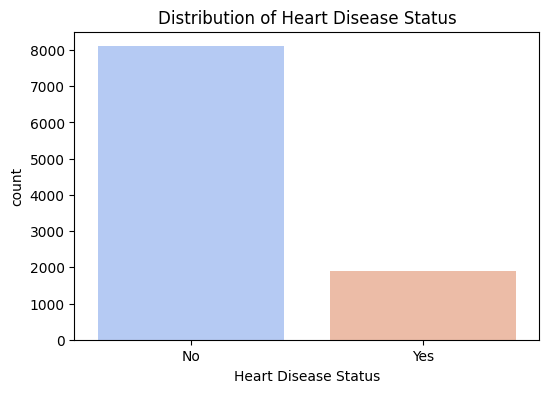

In [14]:
# Distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='Heart Disease Status', data=df, palette='coolwarm')
plt.title("Distribution of Heart Disease Status")
plt.show()

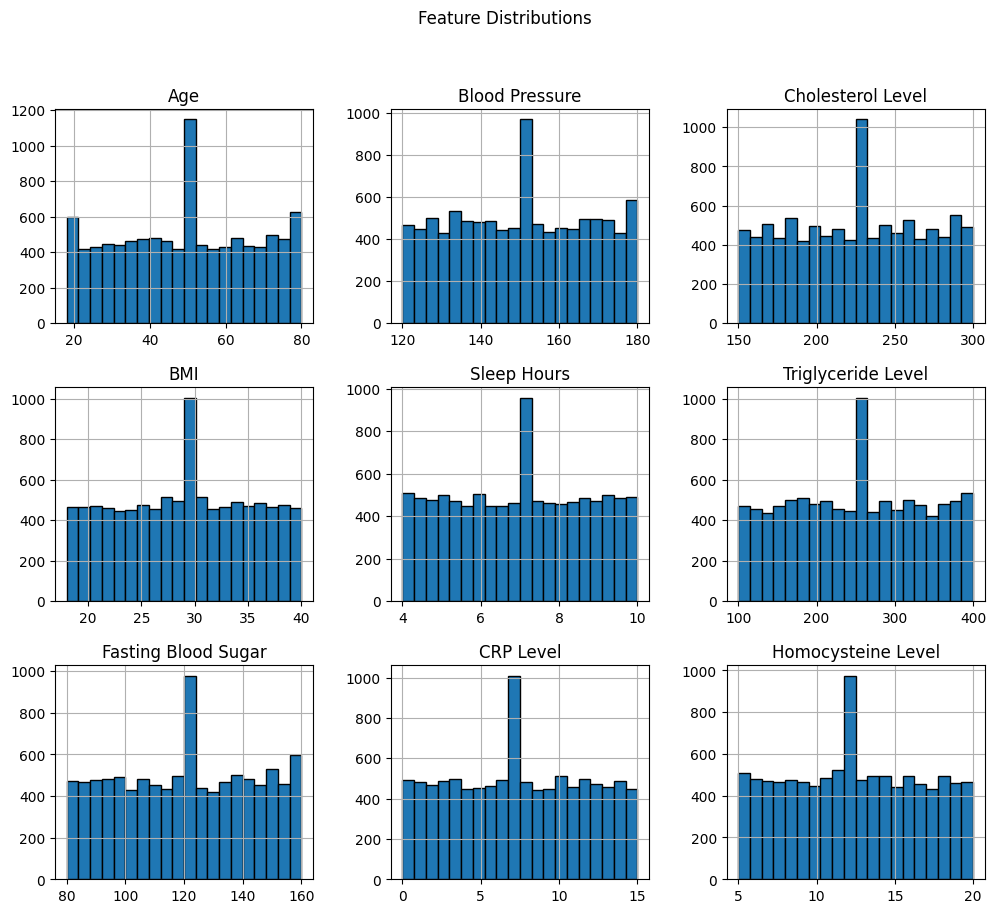

In [15]:
# Visualizing numeric feature distributions
df.hist(figsize=(12, 10), bins=20, edgecolor='black')
plt.suptitle("Feature Distributions")
plt.show()

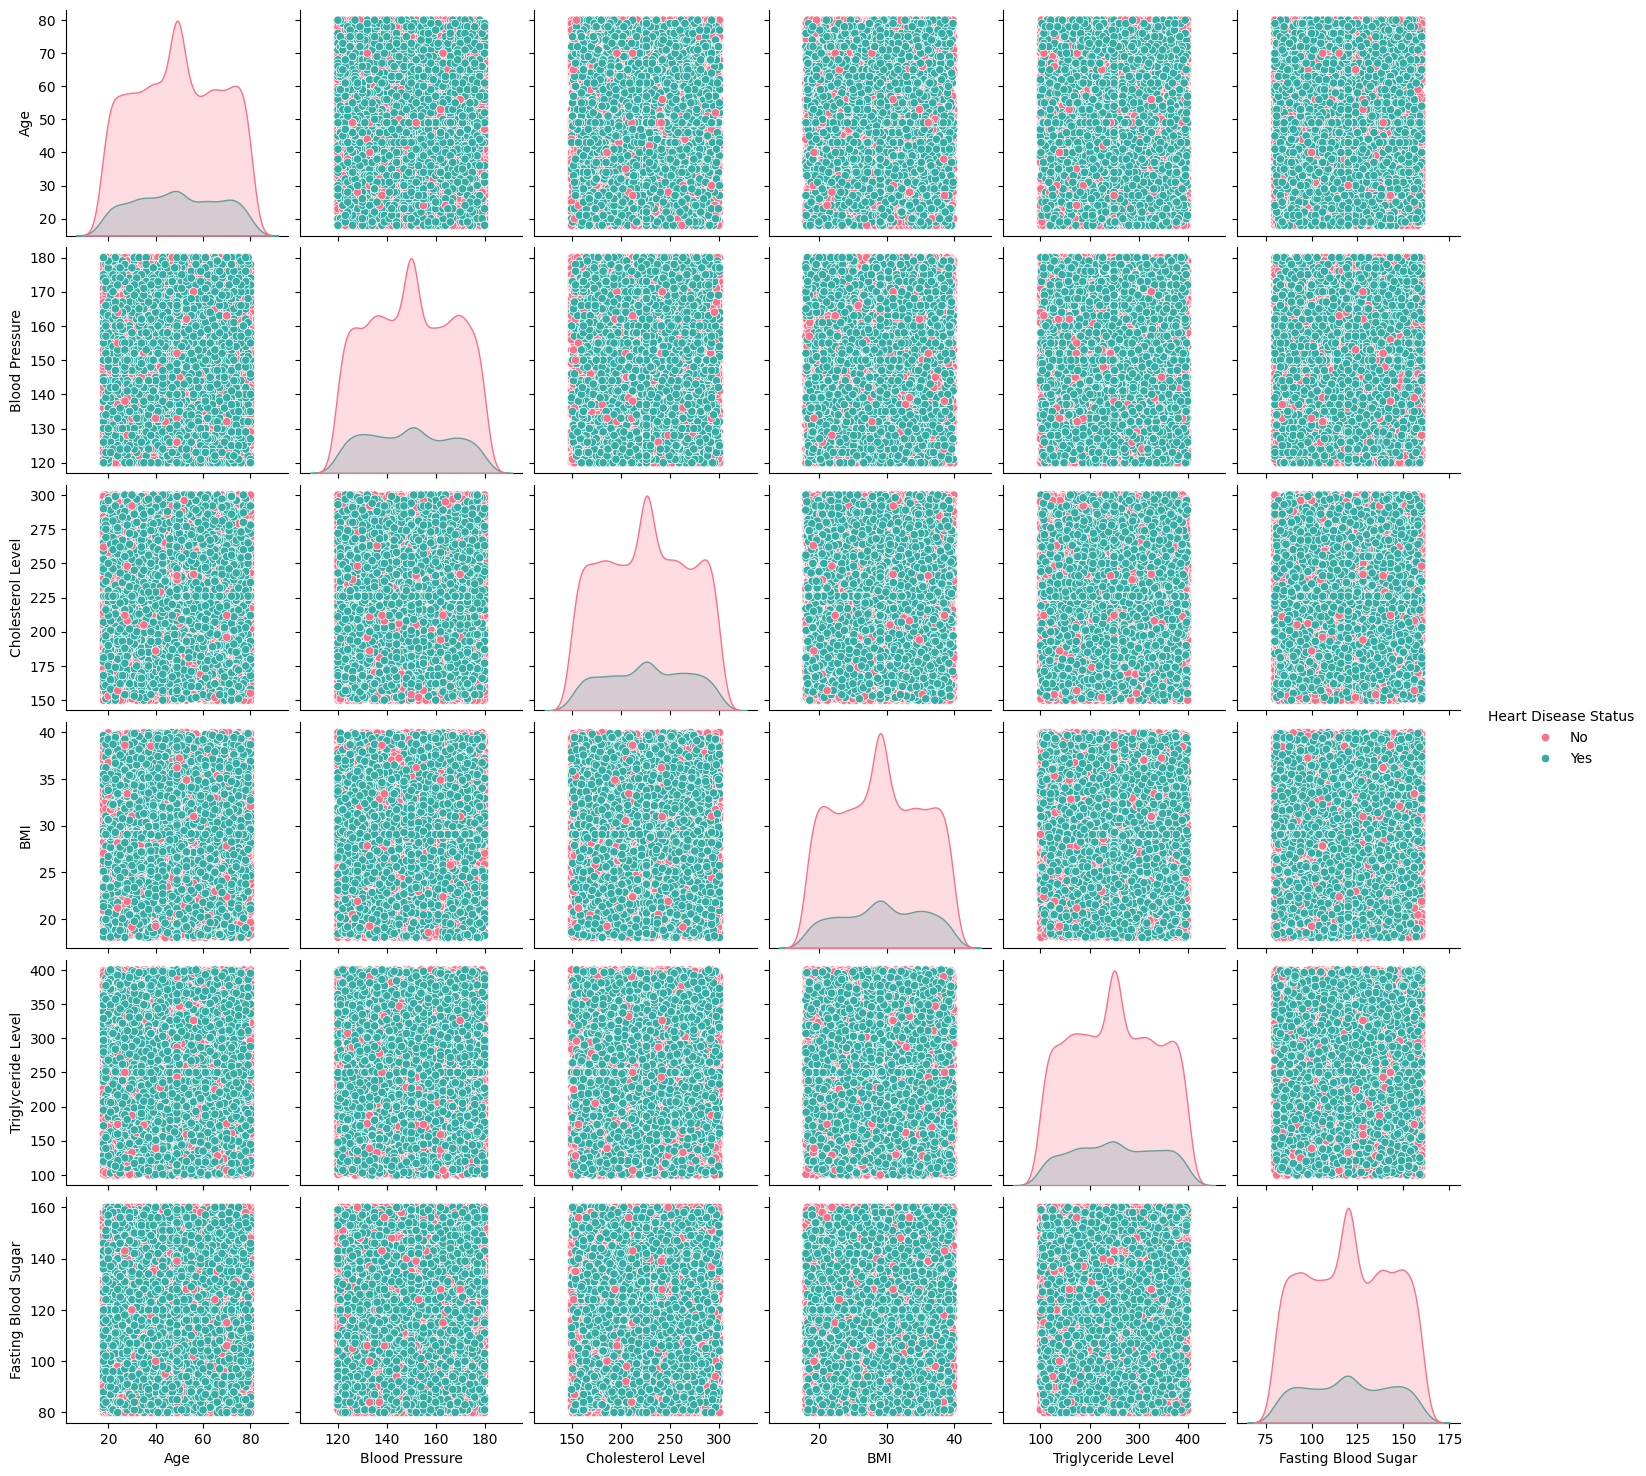

In [16]:
# Pairplot of selected features
selected_features = ['Age', 'Blood Pressure', 'Cholesterol Level', 'BMI', 'Triglyceride Level', 'Fasting Blood Sugar', 'Heart Disease Status']
sns.pairplot(df[selected_features], hue='Heart Disease Status', palette='husl')
plt.show()

<ipython-input-17-440502145ebc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Heart Disease Status', y='Age', data=df, palette='coolwarm')


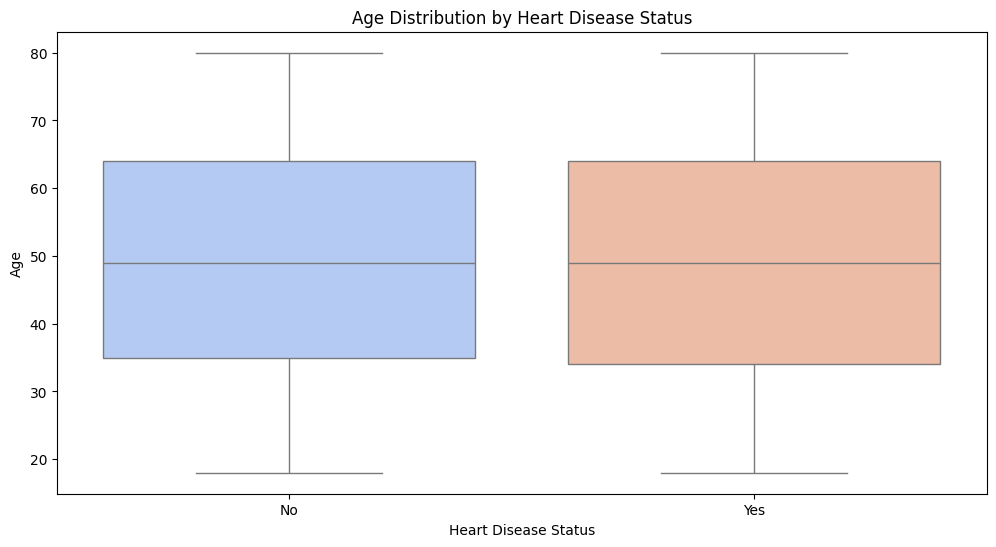

In [17]:
# Boxplot of key features vs target
plt.figure(figsize=(12, 6))
sns.boxplot(x='Heart Disease Status', y='Age', data=df, palette='coolwarm')
plt.title("Age Distribution by Heart Disease Status")
plt.show()

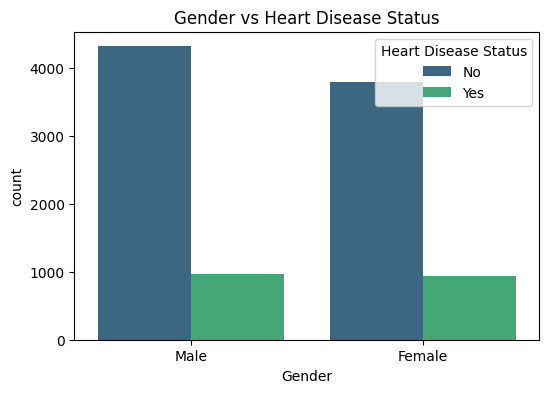

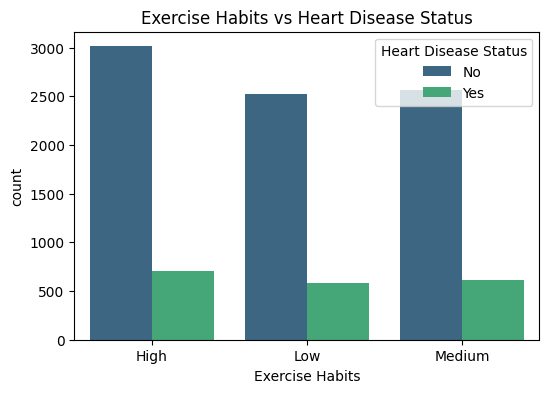

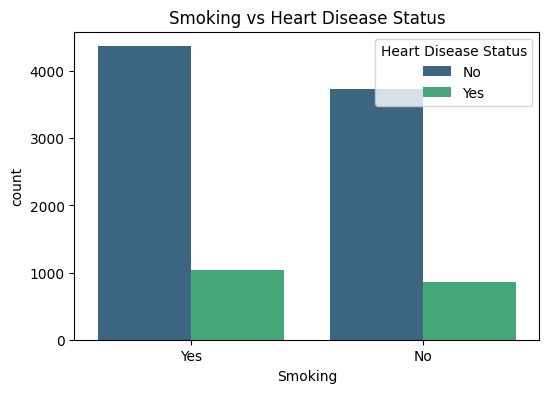

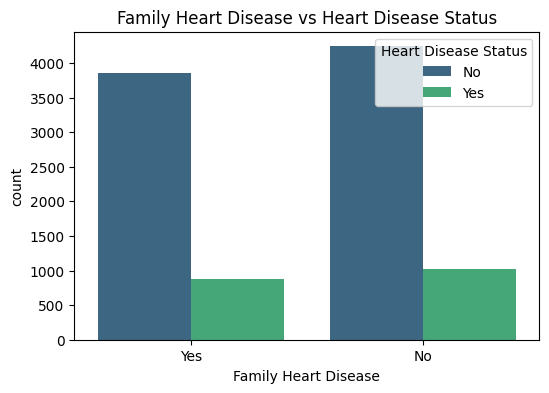

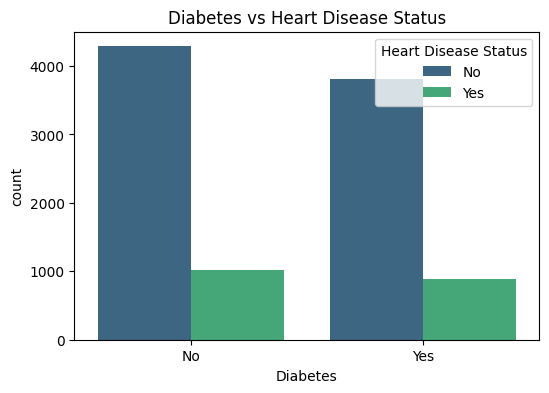

In [18]:
# Bar plot for categorical variables
categorical_features = ['Gender', 'Exercise Habits', 'Smoking', 'Family Heart Disease', 'Diabetes']
for feature in categorical_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=feature, hue='Heart Disease Status', data=df, palette='viridis')
    plt.title(f"{feature} vs Heart Disease Status")
    plt.show()

In [19]:
# Encoding Categorical Variables
for col in df.select_dtypes(include=['object']).columns:
    df[col] = LabelEncoder().fit_transform(df[col])


# Splitting Dataset
X = df.drop(columns=['Heart Disease Status'])  # Features
y = df['Heart Disease Status']  # Target

In [20]:
# Apply SMOTE to balance classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Standardizing Data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
# Logistic Regression model from scratch

# Initialize weights and bias
weights = np.zeros(X_train.shape[1])
bias = 0

In [22]:
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Cost function and gradient computation
def compute_cost_and_gradient(X, y, weights, bias):
    m = X.shape[0]
    z = np.dot(X, weights) + bias
    predictions = sigmoid(z)

    # Cost: Binary cross-entropy
    cost = -np.mean(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))

    # Gradients
    dw = np.dot(X.T, (predictions - y)) / m
    db = np.mean(predictions - y)

    return cost, dw, db

In [23]:
# Gradient descent optimization
def gradient_descent(X, y, weights, bias, learning_rate, num_iterations):
    for i in range(num_iterations):
        cost, dw, db = compute_cost_and_gradient(X, y, weights, bias)

        # Update weights and bias
        weights -= learning_rate * dw
        bias -= learning_rate * db

        # Print cost every 100 iterations for debugging
        if i % 100 == 0:
            print(f"Iteration {i}: Cost {cost}")

    return weights, bias

In [24]:
# Predict labels using the trained model
def predict(X, weights, bias):
    z = np.dot(X, weights) + bias
    probabilities = sigmoid(z)
    return (probabilities >= 0.5).astype(int)  # Threshold at 0.5

In [25]:
# Training the Logistic Regression model from scratch
learning_rate = 0.01
num_iterations = 1000

# Train using gradient descent
weights, bias = gradient_descent(X_train, y_train, weights, bias, learning_rate, num_iterations)

# Predict on training and test sets
y_train_pred = predict(X_train, weights, bias)
y_test_pred = predict(X_test, weights, bias)

Iteration 0: Cost 0.6931471805599452
Iteration 100: Cost 0.6233501344303658
Iteration 200: Cost 0.5898897190003323
Iteration 300: Cost 0.5725959779913763
Iteration 400: Cost 0.5630397494778586
Iteration 500: Cost 0.5574808404250352
Iteration 600: Cost 0.5541200998415969
Iteration 700: Cost 0.5520282287909712
Iteration 800: Cost 0.5506967515812186
Iteration 900: Cost 0.5498344202021701


In [26]:
# Evaluate the model
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f"\n{model_name} Evaluation:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}\n")

# Evaluate the scratch Logistic Regression model
print("Logistic Regression from Scratch:")
evaluate_model(y_train, y_train_pred, "Train Set")
evaluate_model(y_test, y_test_pred, "Test Set")

Logistic Regression from Scratch:

Train Set Evaluation:
Accuracy: 0.73
Precision: 0.73
Recall: 0.73
F1 Score: 0.73


Test Set Evaluation:
Accuracy: 0.72
Precision: 0.74
Recall: 0.71
F1 Score: 0.73



In [27]:
# Train and Evaluate Scikit-Learn Model logistic regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Train and Evaluate Scikit-Learn Model KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred_log = log_reg.predict(X_test)
y_pred_knn = knn.predict(X_test)

In [28]:
# Evaluate the model
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    conf_matrix = confusion_matrix(y_true, y_pred)
    print(f"\n{model_name} Evaluation:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print("Confusion Matrix:")
    print(conf_matrix)

evaluate_model(y_test, y_pred_log, "Logistic Regression")
evaluate_model(y_test, y_pred_knn, "KNN")


Logistic Regression Evaluation:
Accuracy: 0.72
Precision: 0.74
Recall: 0.71
F1 Score: 0.73
Confusion Matrix:
[[1165  416]
 [ 478 1182]]

KNN Evaluation:
Accuracy: 0.75
Precision: 0.71
Recall: 0.88
F1 Score: 0.78
Confusion Matrix:
[[ 975  606]
 [ 197 1463]]


In [29]:
# Tune Hyperparameters
param_grid_knn = {'n_neighbors': range(1, 21)}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='accuracy')
grid_knn.fit(X_train, y_train)

param_grid_lr = {'C': [0.01, 0.1, 1, 10, 100]}
grid_lr = GridSearchCV(LogisticRegression(), param_grid_lr, cv=5, scoring='accuracy')
grid_lr.fit(X_train, y_train)

print("Best K for KNN:", grid_knn.best_params_['n_neighbors'])
print("Best C for Logistic Regression:", grid_lr.best_params_['C'])



Best K for KNN: 2
Best C for Logistic Regression: 0.01


In [30]:
# Feature Selection using Correlation
correlation = df.corr()['Heart Disease Status'].abs().sort_values(ascending=False)
selected_features = correlation[1:11].index.tolist()
print("Selected Features (Filter Method):", selected_features)

X_train_selected = X_train[:, [X.columns.get_loc(col) for col in selected_features]]
X_test_selected = X_test[:, [X.columns.get_loc(col) for col in selected_features]]



Selected Features (Filter Method): ['Alcohol Consumption', 'Gender', 'Stress Level', 'BMI', 'Blood Pressure', 'High LDL Cholesterol', 'Sugar Consumption', 'Family Heart Disease', 'Cholesterol Level', 'Homocysteine Level']


In [31]:
#Train Models with Selected Features & Tuned Parameters
log_reg = LogisticRegression(C=grid_lr.best_params_['C'])
knn = KNeighborsClassifier(n_neighbors=grid_knn.best_params_['n_neighbors'])

log_reg.fit(X_train_selected, y_train)
knn.fit(X_train_selected, y_train)

y_pred_log = log_reg.predict(X_test_selected)
y_pred_knn = knn.predict(X_test_selected)

evaluate_model(y_test, y_pred_log, "Logistic Regression (After Tuning & Feature Selection)")
evaluate_model(y_test, y_pred_knn, "KNN (After Tuning & Feature Selection)")

# Conclusion
print("Comparison of Model Performance before and after Feature Selection & Hyperparameter Tuning.")


Logistic Regression (After Tuning & Feature Selection) Evaluation:
Accuracy: 0.66
Precision: 0.68
Recall: 0.65
F1 Score: 0.67
Confusion Matrix:
[[1067  514]
 [ 576 1084]]

KNN (After Tuning & Feature Selection) Evaluation:
Accuracy: 0.67
Precision: 0.74
Recall: 0.54
F1 Score: 0.62
Confusion Matrix:
[[1263  318]
 [ 761  899]]
Comparison of Model Performance before and after Feature Selection & Hyperparameter Tuning.


### Conclusion
1. **Model Performance**:  
   - Initial models (Logistic Regression and KNN) showed good performance with accuracy around 72-75%.
   - After feature selection and hyperparameter tuning, accuracy decreased (Logistic Regression: 0.73 to 0.66, KNN: 0.75 to 0.67).
   - Precision remained stable, but recall decreased for KNN, indicating a trade-off between false positives and false negatives.

2. **Impact of Methods**:  
   - Feature selection and hyperparameter tuning reduced model complexity but led to a decrease in performance, especially recall.
   - These techniques did not necessarily improve the models, suggesting they may have removed valuable features.

3. **Insights and Future Directions**:  
   - Feature selection and tuning can influence performance, but results vary depending on the dataset.
   - Future work could involve exploring other feature selection methods, additional hyperparameter tuning techniques, or experimenting with other algorithms like Random Forests or Gradient Boosting.